In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

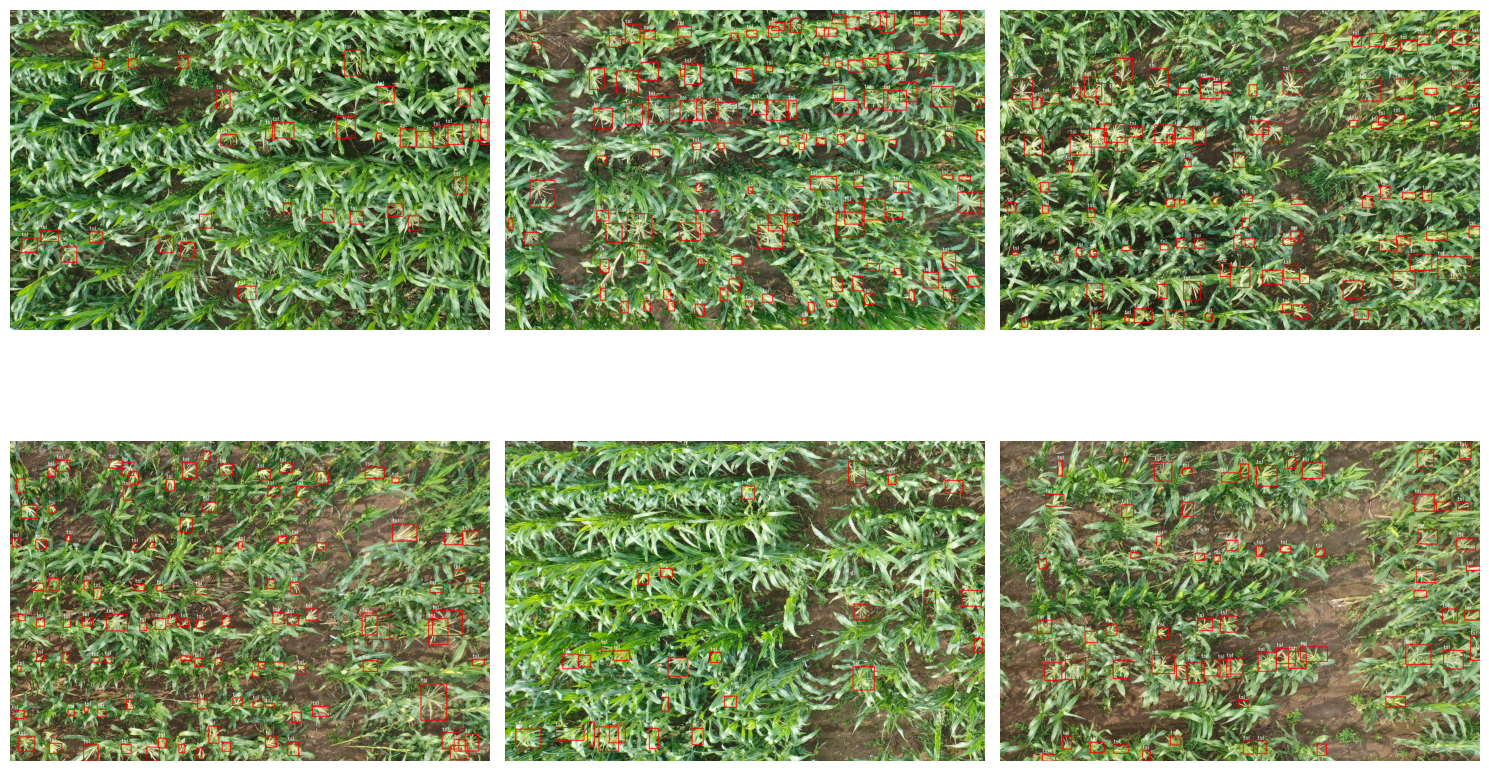

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/images"
labels_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Увеличенная толщина
        font_scale = 1.0  # Увеличенный масштаб шрифта
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=800,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='10_big_res',
            batch=32, device=device, seed=69,
            degrees=10,
            flipud=0.1,
            mixup=0.2)

New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=800, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=10_big_res, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<?, ?it/s]


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to YOLO11s/10_big_res/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to YOLO11s/10_big_res
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      20.4G       3.77      2.926      2.058        410        800: 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        124       7610      0.139      0.172     0.0828     0.0234


2025-04-23 18:28:20,468 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      20.3G      2.421      1.609      1.241        884        800: 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all        124       7610      0.106      0.506      0.249     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80        22G      2.259      1.428      1.178        672        800: 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all        124       7610      0.308      0.437      0.314     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      17.8G       2.18      1.338      1.147        800        800: 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        124       7610      0.604      0.537       0.56      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      22.7G      2.165      1.351      1.137        620        800: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all        124       7610      0.605      0.588       0.59      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      19.9G      2.105      1.262      1.113        516        800: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all        124       7610      0.743      0.636      0.701      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      19.5G      2.156      1.313      1.128        948        800: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all        124       7610      0.677      0.655      0.671      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      22.3G      2.078       1.26      1.099        541        800: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all        124       7610      0.738      0.659      0.711      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      18.1G      2.008      1.158      1.091        313        800: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all        124       7610      0.774      0.689      0.743      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      22.9G      2.041       1.19      1.103        948        800: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all        124       7610      0.757      0.693      0.737      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      18.7G      2.004       1.15      1.087        504        800: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all        124       7610      0.777      0.686      0.755      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      18.9G      2.022      1.163      1.095        350        800: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all        124       7610      0.796      0.695      0.759      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      20.6G       1.97      1.123      1.074        649        800: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        124       7610      0.772      0.665      0.738      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      17.6G      1.997      1.112      1.078        510        800: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        124       7610      0.788      0.721      0.776      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      19.4G      1.974       1.11      1.079        342        800: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        124       7610      0.802      0.734      0.792      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80        22G      1.958      1.075      1.067        865        800: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        124       7610      0.787      0.733      0.771      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      18.1G      2.021      1.133      1.079        899        800: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        124       7610      0.787      0.717      0.765      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80        19G      1.933      1.092       1.07        703        800: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        124       7610      0.811      0.729      0.789      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      22.7G      1.987       1.12      1.077        595        800: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        124       7610      0.804      0.727      0.783      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      18.7G       1.92      1.077      1.064        720        800: 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        124       7610      0.815      0.742      0.793       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80        19G      1.952      1.075      1.061        586        800: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        124       7610      0.807       0.73      0.787      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      18.8G      1.915      1.061      1.061        859        800: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.827      0.733      0.793      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      22.8G      1.949      1.072      1.058        601        800: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        124       7610      0.789      0.732       0.78      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      18.8G      1.904      1.058       1.06        429        800: 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        124       7610      0.833      0.743      0.814      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80        23G       1.93      1.058      1.062        479        800: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        124       7610      0.789      0.709      0.775      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      20.1G      1.904      1.049      1.064        712        800: 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.795       0.74      0.795      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      21.7G      1.908      1.036      1.064        639        800: 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        124       7610      0.809       0.74        0.8      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      20.8G      1.909      1.057      1.068        610        800: 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        124       7610      0.813      0.745      0.796      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      22.3G      1.924      1.045      1.059        679        800: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610      0.809      0.728      0.791      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      21.9G      1.894      1.048      1.056        461        800: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.815      0.732      0.799       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80        23G      1.931      1.053      1.056        618        800: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        124       7610      0.821      0.744      0.811      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      22.7G      1.883      1.035      1.054        632        800: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.829      0.739      0.805      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      19.6G       1.89      1.027      1.056        710        800: 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.839      0.754      0.815      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80        18G      1.897       1.05      1.048        528        800: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all        124       7610       0.84      0.773      0.827      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      3.17G      1.854     0.9953      1.039        668        800: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        124       7610      0.829       0.76      0.825      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80        20G      1.894      1.013      1.053        521        800: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all        124       7610       0.83      0.745      0.815      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      22.8G      1.918      1.043      1.057       1189        800: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        124       7610      0.821      0.741      0.809      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      22.9G      1.873      1.016      1.045        438        800: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        124       7610       0.83      0.761      0.822      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      19.5G      1.875          1      1.044        671        800: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        124       7610      0.826      0.749      0.809      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      20.4G      1.915      1.042      1.051        797        800: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all        124       7610      0.833      0.759      0.816      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      17.9G      1.857     0.9901      1.034        404        800: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        124       7610      0.806      0.758      0.803      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      20.9G      1.864     0.9792      1.039        471        800: 100%|██████████| 16/16 [00:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        124       7610      0.835      0.762      0.824      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      19.9G      1.853     0.9916      1.046        463        800: 100%|██████████| 16/16 [00:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        124       7610      0.843      0.756      0.829      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80        19G      1.871          1       1.04        591        800: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all        124       7610      0.836      0.768      0.833      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      20.7G      1.861     0.9979      1.038        745        800: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.842      0.757      0.834      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      22.2G      1.877     0.9916      1.043        747        800: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.838      0.761       0.83      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      20.3G      1.835     0.9849      1.039        665        800: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610      0.841      0.764      0.835      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      17.1G      1.833     0.9679      1.039        314        800: 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610      0.843      0.764      0.836      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      19.8G      1.854     0.9872      1.043        701        800: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        124       7610      0.833      0.757      0.824      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      18.6G      1.849     0.9906      1.034        882        800: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        124       7610      0.852      0.764      0.838      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      21.7G      1.872     0.9923      1.043        898        800: 100%|██████████| 16/16 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.844      0.768      0.835      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      18.8G      1.884      1.006      1.047        789        800: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all        124       7610      0.832      0.775      0.829      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      21.9G      1.855     0.9918      1.033        605        800: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610      0.834      0.766      0.831      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      20.9G       1.83     0.9622      1.034        507        800: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.843      0.774      0.839      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      18.1G      1.843     0.9693       1.04        777        800: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all        124       7610      0.847       0.76      0.834      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      17.7G      1.857     0.9758      1.032        867        800: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all        124       7610       0.83      0.769      0.831      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      18.5G      1.839     0.9779      1.036        593        800: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.829       0.78      0.835      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      19.9G       1.82     0.9593      1.038        487        800: 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610      0.842      0.776       0.84      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      20.9G      1.827     0.9538      1.036        394        800: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        124       7610      0.843      0.784       0.84      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      19.8G      1.815     0.9521      1.031        615        800: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.845      0.774      0.839      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      18.7G      1.837     0.9677       1.03        595        800: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        124       7610      0.834      0.751      0.825      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      19.6G      1.826     0.9531      1.027        638        800: 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        124       7610      0.836      0.773      0.836      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      18.7G      1.824     0.9574       1.04        475        800: 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.852      0.778      0.843      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      21.2G      1.844     0.9707      1.035        449        800: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all        124       7610      0.844      0.788      0.844      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      17.8G      1.814     0.9606      1.028        569        800: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        124       7610      0.845      0.778      0.842      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      22.7G      1.845     0.9695      1.037        779        800: 100%|██████████| 16/16 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        124       7610      0.832      0.782      0.837      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      18.8G      1.776      0.914      1.022        495        800: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.856      0.778      0.849      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      17.7G      1.832      0.951       1.03        917        800: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.841      0.785      0.841      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80        23G      1.803     0.9356       1.03        692        800: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        124       7610      0.838      0.785      0.843      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80        21G      1.803     0.9539      1.026        262        800: 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        124       7610      0.842      0.781      0.844      0.415


Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      17.7G      1.721     0.9598      1.032        310        800: 100%|██████████| 16/16 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610      0.841      0.769      0.833      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      14.3G      1.688     0.8546      1.018        266        800: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.841      0.768      0.837      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80        16G      1.685     0.8498      1.025        167        800: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        124       7610      0.842      0.767      0.835       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      14.5G       1.66     0.8231      1.019        267        800: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        124       7610      0.847      0.764      0.837      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      13.6G      1.673     0.8288      1.008        254        800: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        124       7610      0.848      0.773      0.841      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      15.3G      1.676     0.8287      1.012        339        800: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610      0.847       0.78      0.842      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      13.9G      1.665     0.8301       1.02        160        800: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all        124       7610      0.855      0.776      0.846      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      16.2G      1.666     0.8137      1.012        375        800: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        124       7610      0.856      0.778      0.847      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      14.7G      1.661     0.8132      1.014        362        800: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        124       7610       0.85      0.783      0.847      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      13.6G      1.646      0.805      1.008        253        800: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        124       7610       0.85      0.783      0.846      0.417



80 epochs completed in 0.164 hours.
Optimizer stripped from YOLO11s/10_big_res/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/10_big_res/weights/best.pt, 19.2MB

Validating YOLO11s/10_big_res/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]


                   all        124       7610      0.858      0.778      0.849      0.421
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO11s/10_big_res


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9230653df0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

2025-04-23 18:38:18,814 - clearml.storage - INFO - Uploading: 18.29MB to YOLO11s/10_big_res/weights/best.pt


██████████████████████████████▉ 100% | 18.29/18.29 MB [00:01<00:00, 12.71MB/s]: 

2025-04-23 18:38:20,262 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLO11s/10_big_res.abace889285e47568150e6e29c3e388c/models/best.pt


In [6]:
df = pd.read_csv('YOLO11s/10_big_res/results.csv')

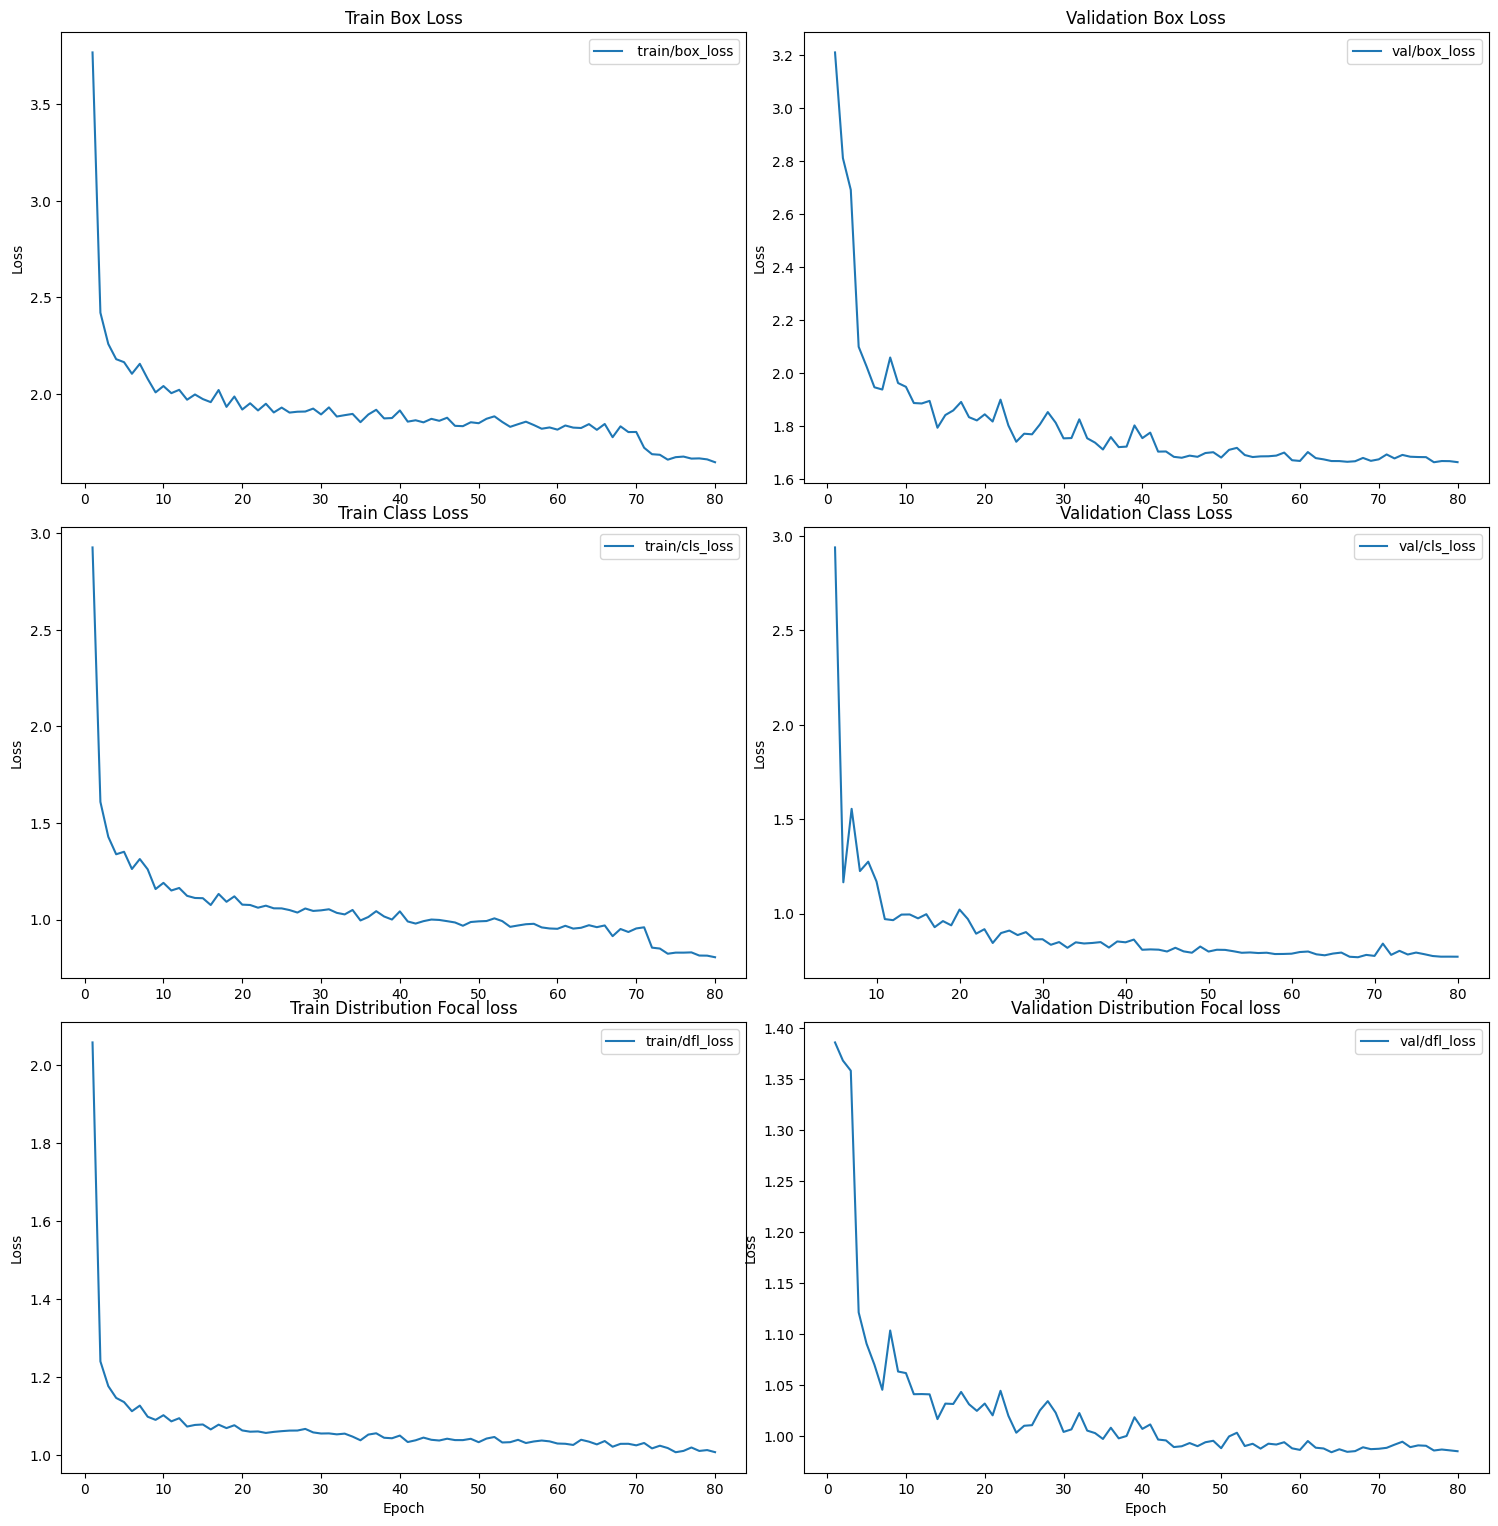

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

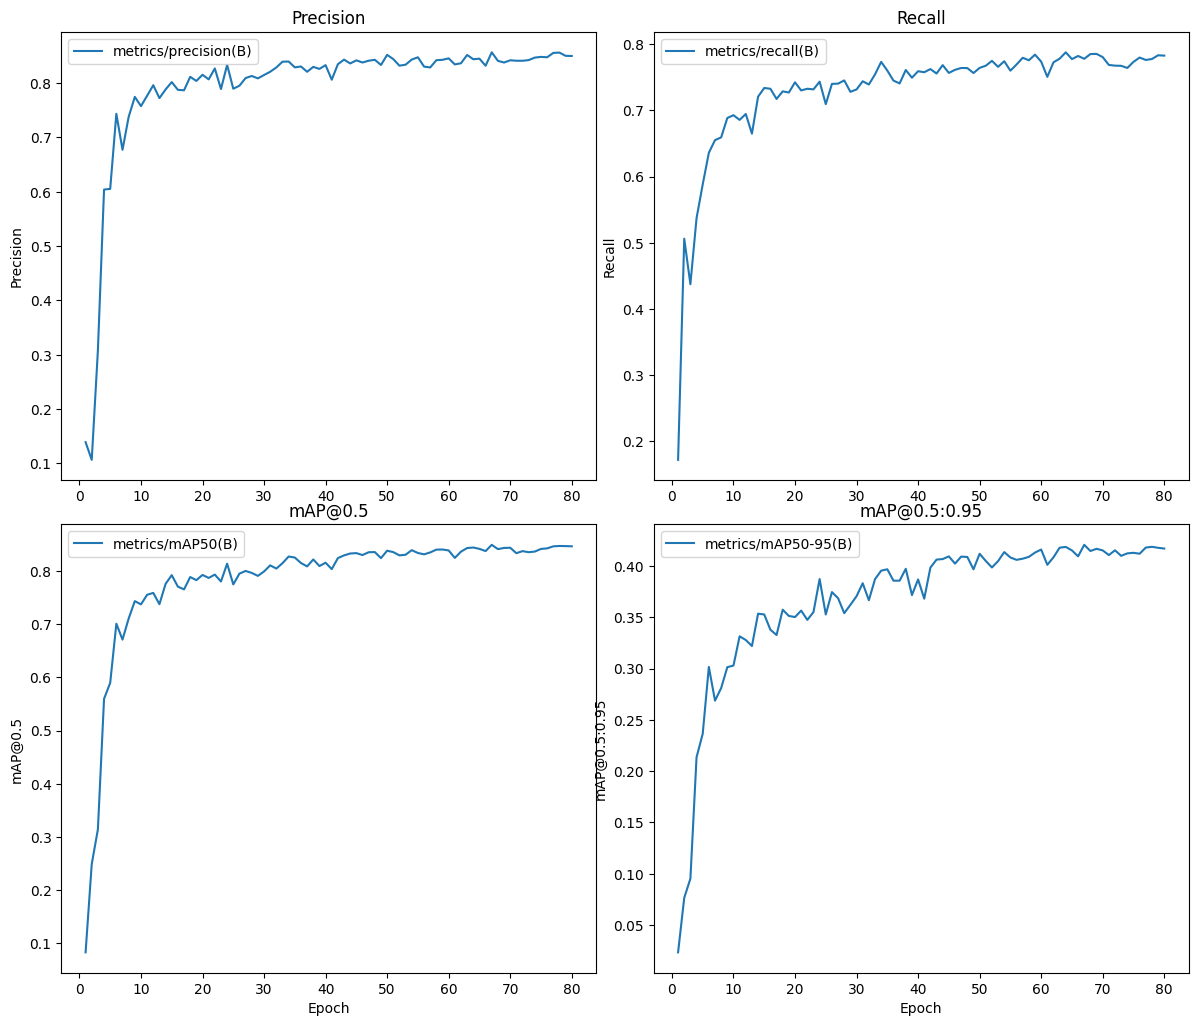

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

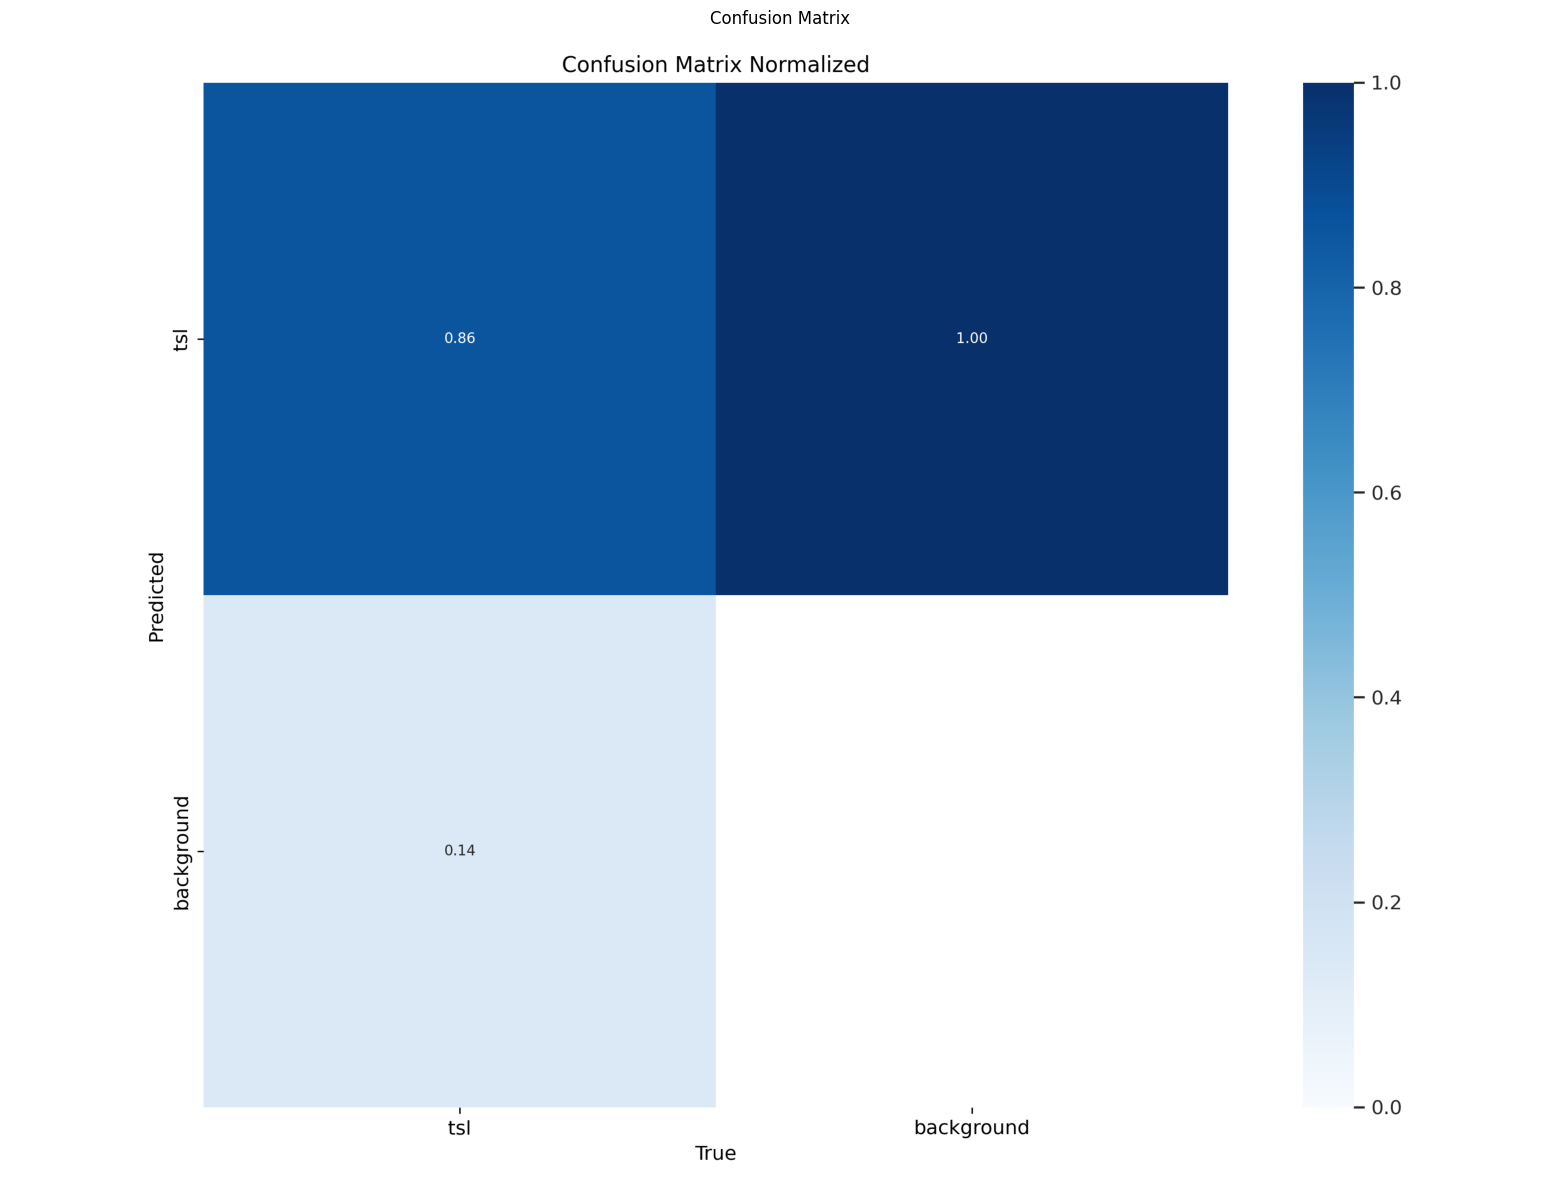

In [9]:
confusion_matrix = Image.open("YOLO11s/10_big_res/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg: 544x800 56 tsls, 79.8ms
Speed: 3.0ms preprocess, 79.8ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 800)


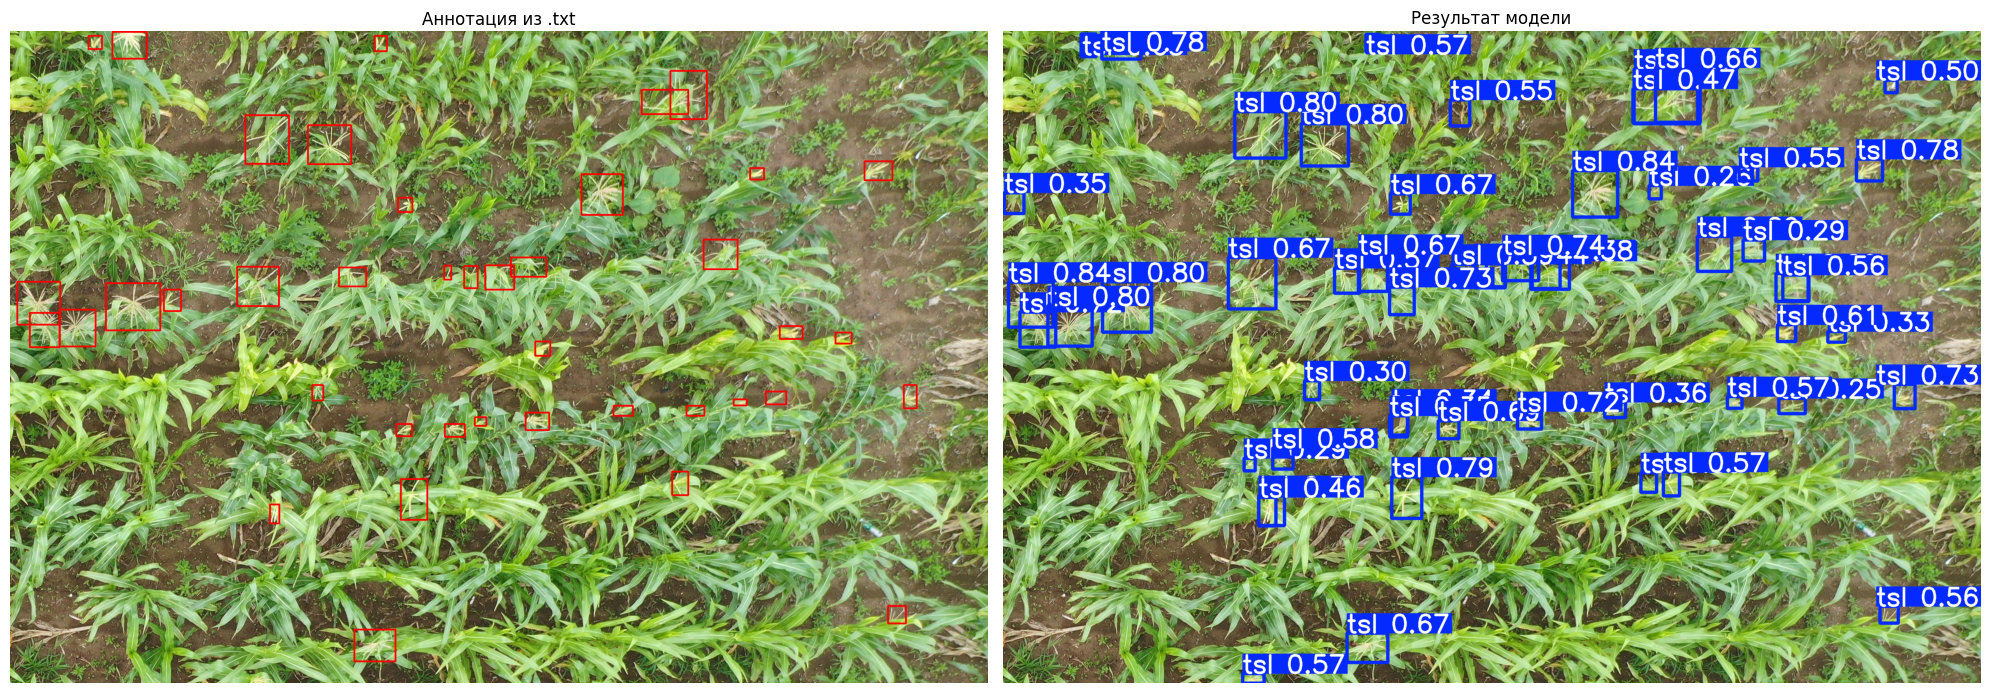

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = '/home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg'
label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

# Загружаем оригинальное изображение
orig_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
height, width = orig_img.shape[:2]

# Загружаем аннотации
with open(label_path, 'r') as f:
    boxes = f.readlines()

# Рисуем боксы
for box in boxes:
    cls, x_center, y_center, w, h = map(float, box.strip().split())
    x1 = int((x_center - w / 2) * width)
    y1 = int((y_center - h / 2) * height)
    x2 = int((x_center + w / 2) * width)
    y2 = int((y_center + h / 2) * height)
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Прогоняем изображение через модель
res = model(image_path)
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

# Отображаем оба изображения
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(orig_img)
axes[0].set_title("Аннотация из .txt")
axes[0].axis('off')

axes[1].imshow(detect_img)
axes[1].set_title("Результат модели")
axes[1].axis('off')

plt.tight_layout()
plt.show()
